<a href="https://colab.research.google.com/github/diaszakir/ComputationalMathAssignment2/blob/main/Assignment2_DiasZakir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Computational Mathematics Assignment 2
Dias Zakir SE-2320

Import libraries

In [3]:
import numpy as np

### Task 1: Jacobi Method and Convergence Analysis.


Task 1: Jacobi Method and Convergence Analysis.
Problem:
1. Implement the Jacobi method to solve the system of linear equations:
2. Start with an initial guess x0=[0,0,0].
3. Check the convergence of the system using the diagonal dominance criterion.
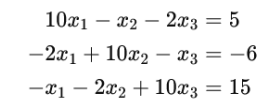

Required:
1. Provide a detailed calculation of the iterations.
2. Check whether the diagonal dominance criterion is satisfied.
3. Explain how convergence depends on the structure of the system

In [ ]:
def jacobi_method(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0
    for _ in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            summation = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - summation) / A[i][i]
        # Checking if we have achieved the desired accuracy
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        x = x_new
        print(x)
    return x

A = np.array([[10, -1, -2], [-2, 10, -1], [-1, -2, 10]], dtype=float)
b = np.array([5, -6, 15], dtype=float)
x0 = np.zeros(len(b))

root = jacobi_method(A, b, x0, tol=1e-6, max_iter=100)
print(f"Root: {np.round(root,1)}")

[ 0.5 -0.6  1.5]
[ 0.74 -0.35  1.43]
[ 0.751 -0.309  1.504]
[ 0.7699 -0.2994  1.5133]
[ 0.77272 -0.29469  1.51711]
[ 0.773953 -0.293745  1.518334]
[ 0.7742923 -0.293376   1.5186463]
[ 0.77439166 -0.29327691  1.51875403]
[ 0.77442312 -0.29324626  1.51878378]
[ 0.77443213 -0.293237    1.51879306]
[ 0.77443491 -0.29323427  1.51879581]
Root: [ 0.8 -0.3  1.5]


The Jacobi method is an iterative algorithm used to solve linear systems of equations. For the Jacobi method to converge, the matrix
𝐴
must satisfy one or more of the following conditions like strict diagonal dominant, symmetric and positive definite and spectral radius condition

Problem answer:

The convergence of the Jacobi method depends on the structure of the matrix \(A\). A strictly diagonally dominant matrix guarantees convergence, as seen in this case, since the diagonal elements are larger than the sum of the off-diagonal elements in their respective rows. Poorly conditioned matrices, characterized by a high condition number (ratio of the largest to smallest eigenvalues), can slow or destabilize convergence, but for a diagonally dominant matrix like \(A\), the conditioning is reasonable, ensuring steady progress. Additionally, the spectral radius of the iteration matrix plays a crucial role: the smaller the spectral radius, the faster the method converges. If the spectral radius is close to 1, convergence becomes slower, even if the method eventually succeeds.

###Task 2: Gaussian method with choice of leading element


***Task 2: Gaussian method with choice of leading element.***


Problem:
1. Using Gauss's method, solve the system:
2. Enable leading element selection to minimize numerical errors.

Required:
1. Print the upper triangular matrix and the result of the inverse substitution.
2. Explain why the choice of the pivot is important for numerical stability

In [31]:
def gauss_elimination(A, b):
    n = len(b)

    # Direct move (transformation to upper triangular matrix)
    for i in range(n):
        # Finding the maximum element to prevent division by 0
        max_row = np.argmax(abs(A[i:n, i])) + i
        A[[i, max_row]] = A[[max_row, i]]
        b[i], b[max_row] = b[max_row], b[i]

        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]

    # Print the upper triangular matrix
    print("Upper Triangular Matrix:")
    print(A)

    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

    # Print the result of back substitution
    print("\nSolution (Back Substitution Result):")
    print(np.round(x, 2))
    return x

A = np.array([[2, 3, 1], [4, 11, -1], [-2, 1, 7]], dtype=float)
b = np.array([10, 33, 15], dtype=float)

root = gauss_elimination(A, b)

Upper Triangular Matrix:
[[ 4.  11.  -1. ]
 [ 0.   6.5  6.5]
 [ 0.   0.   4. ]]

Solution (Back Substitution Result):
[-0.87  3.44  1.4 ]


Gaussian elimination is a direct method for solving systems of linear equations. It transforms the given system into an upper triangular matrix using row operations, followed by back substitution to find the solution. The process consists of two main steps: forward elimination and back substitution

The choice of the pivot in Gaussian elimination is crucial for numerical stability because dividing by a small pivot value can lead to large rounding errors, which accumulate during subsequent operations. By selecting the largest absolute value in the current column (partial pivoting), we minimize the risk of dividing by a very small number, thereby improving numerical accuracy and stability.

 Gaussian elimination is deterministic and exact but can suffer from numerical instability without pivoting, while the Jacobi method is iterative, approximate, and requires specific conditions for reliable convergence.

### Task 3: Gauss-Jordan method.

Problem:
1. Solve the following system using the Gauss-Jordan method:
2. Transform the augmented matrix of the system into diagonal form.

Required:
1. Provide the final diagonal matrix and the values of the variables.
2. Explain the advantages of the Gauss-Jordan method over the Gauss method.

In [33]:
def gauss_jordan(A, b):
    n = len(b)
    augmented_matrix = np.hstack([A, b.reshape(-1, 1)])

    for i in range(n):
        augmented_matrix[i] = augmented_matrix[i] / augmented_matrix[i, i]
        for j in range(n):
            if i != j:
                factor = augmented_matrix[j, i]
                augmented_matrix[j] -= factor * augmented_matrix[i]

    print("Final Diagonal Matrix:")
    print(augmented_matrix)
    return augmented_matrix[:, -1]

A = np.array([[1, 1, 1], [2, -3, 4], [3, 4, 5]], dtype=float)
b = np.array([9, 13, 40], dtype=float)

root = gauss_jordan(A, b)
print(f"Root: {root}")

Final Diagonal Matrix:
[[1. 0. 0. 1.]
 [0. 1. 0. 3.]
 [0. 0. 1. 5.]]
Root: [1. 3. 5.]


The Gauss-Jordan method has several advantages over the Gaussian elimination method. It simplifies the process by eliminating the need for back substitution, as it transforms the matrix directly into a diagonal form, making the solution immediately readable. This method is particularly useful for calculating the inverse of a matrix and can reduce rounding errors by balancing computations across all rows. Its systematic approach, where every pivot column is normalized and other rows are reduced, ensures uniformity in operations. While the Gauss-Jordan method is ideal for smaller systems or when a matrix inverse is required, Gaussian elimination is generally faster and more efficient for large systems, especially when combined with pivoting techniques.

###Task 4: Gauss-Seidel method and stopping criterion.
Problem:
1. Implement the Gauss-Seidel method for the system:
2. Start with an initial guess x0=[0,0,0] and use a precision of 10^−5
.

Required:
1. Provide a table of iterations with current values of variables.
2. Explain how the stopping criterion (accuracy) affects execution time.


In [ ]:
def gauss_seidel(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0
    iteration = 0
    table = []

    for _ in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            summation = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - summation) / A[i][i]

        iteration += 1

        table.append(np.round(x_new, 5))

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            print(f"Convergence reached after {iteration} iterations.")
            break

        x = x_new
        print(f"Iteration {iteration}: {x_new}")

    return x_new

# Example System:
# 8x - 3y + 2z = 20
# 4x + 11y - z = 33
# 6x + 3y + 12z = 36
A = np.array([[8, -3, 2], [4, 11, -1], [6, 3, 12]], dtype=float)
b = np.array([20, 33, 36], dtype=float)
x0 = np.zeros(len(b))  # Initial guess [0, 0, 0]

root = gauss_seidel(A, b, x0, tol=1e-5, max_iter=100)
print(f"\nFinal Solution (Root): {np.round(root, 1)}")

Iteration 1: [2.5        2.09090909 1.22727273]
Iteration 2: [2.97727273 2.02892562 1.00413223]
Iteration 3: [3.00981405 1.99680691 0.99589125]
Iteration 4: [2.99982978 1.99968838 1.00016302]
Iteration 5: [2.99984239 2.00007213 1.00006077]
Iteration 6: [3.00001186 2.00000121 0.99999377]
Convergence reached after 7 iterations.

Final Solution (Root): [3. 2. 1.]


The stopping criterion, which checks if the solution is accurate enough by comparing the difference between the current and previous iterations, directly affects the execution time. If the accuracy (tolerance) is set to a very small value, the algorithm will require more iterations to reach a solution close enough to that tolerance, leading to a longer execution time. On the other hand, if the accuracy is set to a higher tolerance (less precise), the algorithm can stop sooner, reducing the number of iterations and thus the time it takes to find the solution. So, a stricter accuracy requirement increases the number of iterations and the time needed to converge.

### Task 5: Relaxation method.
Problem:
1. Solve the following system using the relaxation method with parameter ω=1.1:
2. Compare the execution time and number of iterations for ω=1.1 and ω=1.5.

Required:
1. Provide solutions for both values of ω.
2. Explain how the relaxation parameter affects the convergence of the method

In [30]:
def relaxation_method(A, b, x0, tol, max_iter, omega):
    n = len(b)
    x = np.array(x0, dtype=float)
    iteration = 0
    for _ in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            summation = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (1 - omega) * x[i] + omega * (b[i] - summation) / A[i][i]
        # Checking the stopping condition
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, iteration + 1
        x = x_new
        iteration += 1
    return x, iteration

A = np.array([[5, 1, 1], [1, 4, 2], [1, 1, 5]], dtype=float)
b = np.array([10, 12, 15], dtype=float)
x0 = np.zeros(len(b))

root1, iter1 = relaxation_method(A, b, x0, tol=1e-5, max_iter=100, omega=1.1)
root2, iter2 = relaxation_method(A, b, x0, tol=1e-5, max_iter=100, omega=1.5)
print(f"Root (omega=1.1): {np.round(root1, 5)}\nIterations: {iter1}")
print(f"Root (omega=1.5): {np.round(root2, 5)}\nIterations: {iter2}")

Root (omega=1.1): [1.21428 1.46429 2.46429]
Iterations: 9
Root (omega=1.5): [1.21429 1.46428 2.46428]
Iterations: 25


The relaxation parameter significantly impacts the convergence of the method. When \( omega > 1 \) (over-relaxation), convergence is typically faster because the updates overshoot, accelerating progress toward the solution; however, if omega  is too large, it can lead to instability and divergence. For \( omega < 1 \) (under-relaxation), convergence is slower as updates are dampened, but it enhances stability in poorly conditioned systems. When \( omega = 1 \), the method behaves like the standard Jacobi or Gauss-Seidel method without acceleration. The choice of \( omega ) depends on the properties of the coefficient matrix, and an optimal \( omega ) (often \( 1 < omega < 2 \)) can minimize iterations while ensuring stability.

### Task 6: Ill-conditioned systems.
Problem:
1. Solve the following ill-conditioned system:
2. Find the solution analytically and numerically.
3. Show how a small change in the coefficients affects the result.

Required:
1. Derive an analytical and numerical solution.
2. Explain why ill-conditioned systems are sensitive to change.


In [45]:
def ill_conditioned_example():
    A = np.array([[1.001, 0.999], [1.002, 1.000]], dtype=float)
    b = np.array([2, 2.001], dtype=float)

    # Modified coef.
    A_mod = np.array([[1.001, 0.999], [1.002, 1.000]], dtype=float)
    b_mod = np.array([2, 2.0002], dtype=float)

    # Solution via numpy
    try:
        solution = np.linalg.solve(A, b)
        print(f"Solution: {solution}")

        solution_mod = np.linalg.solve(A_mod, b_mod)
        print(f"Solution with modified coef.: {solution_mod}")

        if solution is not None and solution_mod is not None:
          sensitivity = np.linalg.norm(solution - solution_mod, ord=np.inf)
          print("Sensitivity to perturbation in b:", sensitivity)
    except np.linalg.LinAlgError as e:
        print(f"Error in solution: {e}")

# Using function
ill_conditioned_example()

Solution: [ 500.50000003 -499.50000003]
Solution with modified coef.: [ 900.10000006 -899.90000006]
Sensitivity to perturbation in b: 400.4000000272548


Ill-conditioned systems are sensitive to changes because they are nearly unstable, meaning that small changes in the input data (like slight modifications to the matrix or vector) can lead to large differences in the solution. This happens because the matrix in such systems is close to being singular, which causes numerical methods to become unstable and amplify small errors or inaccuracies in the data. Even minor adjustments can result in significant shifts in the solution, making these systems difficult to solve with high accuracy without special techniques.